In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import os

In [ ]:
data_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))  # Move one level up

# 1. Choose the phenotype

In [ ]:
phenotype = "YPD_doublingtime"

# 2. Prepare the datasets

In [ ]:
phenotype_data_path = os.path.join(data_dir, f"data/y_{phenotype}.csv")
y_phenotype = pd.read_csv(phenotype_data_path)
y_phenotype.drop(columns='Yeast_ID', inplace=True)

In [ ]:
mutations = pd.read_csv(os.path.join(data_dir, "results/mutations_importance_ranking2.csv"))
mutations.drop(columns="Frequency", inplace=True)
mutations_important = mutations.iloc[:17, 0]
mutations_important

0        YLR154C-H_CNV
1          YER188W_CNV
2        YML009C-A_CNV
3          YGR074W_CNV
4          YMR326C_CNV
5          YHR043C_CNV
6        YML057C-A_CNV
7          YFL053W_CNV
8     YPR196W_312_T->I
9          YPL257W_CNV
10         YKR105C_CNV
11         YMR173W_CNV
12         YNR072W_CNV
13         YCR040W_CNV
14         YKL223W_CNV
15         YOR392W_CNV
16         YDR038C_CNV
Name: Feature_ID, dtype: object

In [ ]:
X_matrix = pd.read_pickle(os.path.join(data_dir, f"data/X_matrix_{phenotype}.pkl"))

# 3. Plots the effects of specific proteins on the phenotype

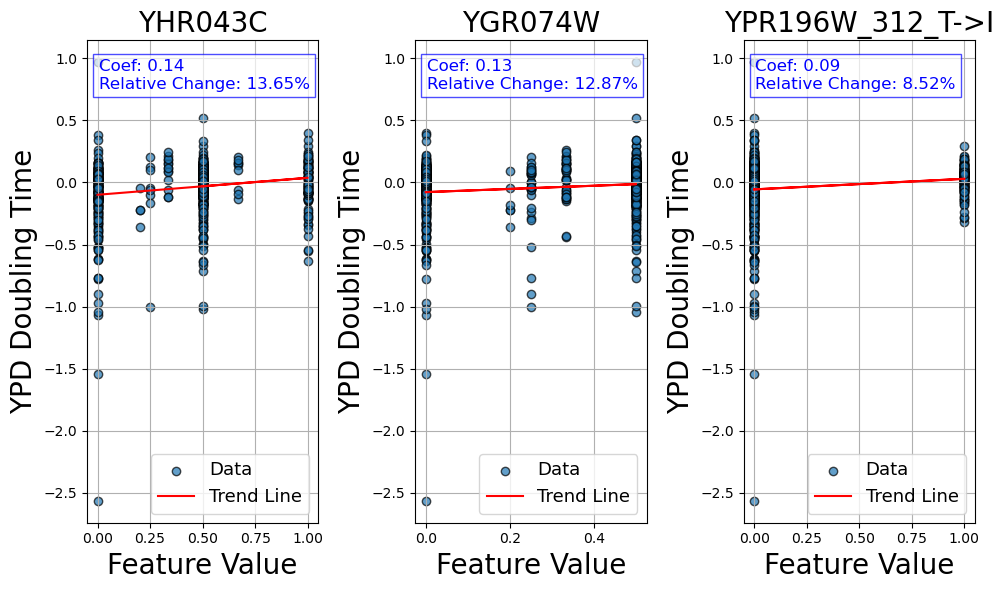

In [ ]:
filter_keys = mutations_important.tolist()  

selected_columns = X_matrix[[col for col in X_matrix.columns if col in filter_keys or col + '_CNV' in filter_keys]]
selected_columns = selected_columns[['YHR043C', 'YGR074W', 'YPR196W_312_T->I']]

num_features = len(selected_columns.columns)

fig, axes = plt.subplots(1, num_features, figsize=(10, 6))  
axes = np.array(axes).flatten()  

# Plot each feature with a regression line
for idx, col in enumerate(selected_columns.columns):
    x = selected_columns[col].values.reshape(-1, 1)  
    y = y_phenotype.flatten()  

    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)

    coef = float(model.coef_[0])  
    intercept = float(model.intercept_)  

    relative_change = coef * 100 
    axes[idx].scatter(x.flatten(), y, alpha=0.7, edgecolor='k', label='Data')   
    axes[idx].plot(x.flatten(), y_pred, color='red', label='Trend Line')
    
    axes[idx].set_title(f'{col}', fontsize=20)
    axes[idx].set_xlabel('Feature Value', fontsize=20)
    axes[idx].set_ylabel('YPD Doubling Time', fontsize=20)
    axes[idx].legend(fontsize=13)
    axes[idx].grid(True)

    axes[idx].text(0.05, 0.9, f'Coef: {coef:.2f}\nRelative Change: {relative_change:.2f}%', 
                   transform=axes[idx].transAxes, fontsize=12, color='blue',
                   bbox=dict(facecolor='white', alpha=0.7, edgecolor='blue'))

plt.tight_layout()

plot_path = os.path.join(data_dir, "results/plots/selected_features_relative_change.png")
plt.savefig(plot_path, bbox_inches='tight')

plt.show()
